# Core Statistics Using Python
### Hana Choi, Simon Business School, University of Rochester


# Assignment 2 Solutions

## Here are the packages/modules we need for this notebook

In [40]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import uniform

## Loading data: DeliveryTimes.xlsx

In [3]:
# Method 1: Save the data file directly to your working directory
# df = pd.read_excel('DeliveryTimes.xlsx')

# Method 2: Tell Python where your data file exists "explicitly"
# Below is "my" file path, you should specify yours instead.
df = pd.read_excel("/Users/hanachoi/Dropbox/teaching/core_statistics/Assignments/Data/DeliveryTimes.xlsx")

## Understanding the dataset

In [14]:
# Display the first few rows of the dataframe
print(df.head())

   Trip  DeliveryTime
0     1          46.5
1     2          40.7
2     3          43.0
3     4          44.4
4     5          46.8


In [12]:
# Summary statistics
print(df.describe())

            Trip  DeliveryTime
count  1400.0000   1400.000000
mean    700.5000     45.106071
std     404.2895      2.469763
min       1.0000     36.900000
25%     350.7500     43.500000
50%     700.5000     45.100000
75%    1050.2500     46.700000
max    1400.0000     53.100000


In [13]:
# Check variable types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Trip          1400 non-null   int64  
 1   DeliveryTime  1400 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.0 KB
None


# Question 1

## Question 1 (a)

In [17]:
df_mean =  df['DeliveryTime'].mean()
print("Sample Mean:", df_mean)

df_sd = df['DeliveryTime'].std()
print("Sample SD:", df_sd)

df_var = df['DeliveryTime'].var()
print("Sample Var:", df_var)

Sample Mean: 45.106071428571425
Sample SD: 2.469762585479157
Sample Var: 6.09972722863269


## Question 1 (b)

In [19]:
# We know that the mean and variance of a uniform random variable distributed between 30 and 60 are:
unif_mean =  (1/2)*(30+60)
print("Uniform Mean:", unif_mean)

unif_var = (1/12)*(60-30)**2
print("Uniform Var:", unif_var)

Uniform Mean: 45.0
Uniform Var: 75.0


### Some comments about Question 1 (b)
- The sample variance we found above 6.10, is WAY smaller than 75, which strongly suggests that the distribution is not uniform.
- This was all I expected you to do. And if you want, you should feel free to stop reading now.
- However, a somewhat more involved evaluation would involve looking at what the actual distribution looks like.
- You can do this with the histogram function (covered in "Describing & Visualizing Data") handout, so not something I expected here.
- Doing so yields the picture below which looks quite Normal (e.g. bell shaped).
- You can compare this to the tab labeled Uniform, where I simulated data (using the random number generator) from a uniform distribution over 30 to 60.
- You can see that it is not at all bell shaped, but rather quite flat instead.
- There are some more formal tests of distribution shapes (e.g. K-S tests), but they are beyond the scope of this class.

<Axes: >

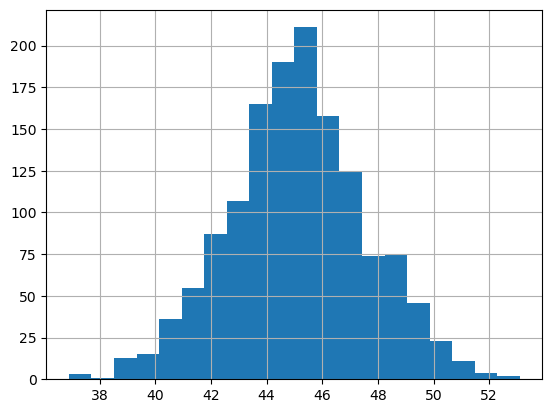

In [34]:
# Histogram of DeliveryTimes in the dataset
df['DeliveryTime'].hist(bins=20)

Sample Size: 1400


array([[<Axes: title={'center': '0'}>]], dtype=object)

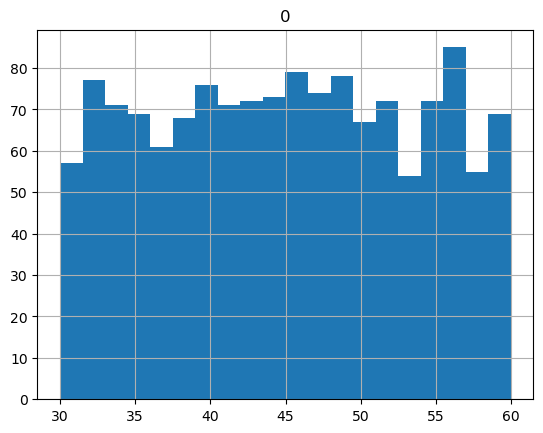

In [38]:
# Generate a random sample from U[30, 60], with the sample size same as that of DeliveryTimes dataset

# Sample size
n = df.shape[0]
print("Sample Size:", n)

# Generate a randome sample from U[30, 60]
uniform_sample = np.random.uniform(low=30, high=60, size=n) 

# Histogram of a random sample from U[30, 60]
pd.DataFrame(uniform_sample).hist(bins=20)

## Question 1 (c)

### Normal Distribution
- Note that these are ranges for the whole population, not statements about the population mean. In other words, these are not confidence intervals.

In [45]:
# 95% interval
range_l_95 = norm.ppf(0.025, loc=df_mean, scale=df_sd) # Alternatively, df_mean - 1.96*df_sd
range_u_95 = norm.ppf(0.975, loc=df_mean, scale=df_sd) # Alternatively, df_mean + 1.96*df_sd
print("Normal 95% Interval:", range_l_95, range_u_95)

# 80% Interval
range_l_80 = norm.ppf(0.1, loc=df_mean, scale=df_sd) 
range_u_80 = norm.ppf(0.9, loc=df_mean, scale=df_sd) 
print("Normal 80% Interval:", range_l_80, range_u_80)

Normal 95% Interval: 40.26542571066775 49.9467171464751
Normal 80% Interval: 41.940943320627134 48.27119953651572


### Uniform Distribution

- For the uniform, you have quite different answers.

In [47]:
# Set the lower and upper bounds for the Uniform distribution
low = 30
high = 60
length = high - low

# 95% interval
range_l_95_unif = uniform.ppf(0.025, loc=low, scale=length) 
range_u_95_unif = uniform.ppf(0.975, loc=low, scale=length) 
print("Uniform 95% Interval:", range_l_95_unif, range_u_95_unif)

# 80% Interval
range_l_80_unif = uniform.ppf(0.1, loc=low, scale=length) 
range_u_80_unif = uniform.ppf(0.9, loc=low, scale=length) 
print("Uniform 80% Interval:", range_l_80_unif, range_u_80_unif)

Uniform 95% Interval: 30.75 59.25
Uniform 80% Interval: 33.0 57.0


## Question 1 (d)

### Normal Distribution

In [51]:
# 45 or less
ans1 = norm.cdf(45, loc=df_mean, scale=df_sd)
print("Normal 45 or less:", ans1)

ans2 = norm.cdf(40, loc=df_mean, scale=df_sd)
print("Normal 40 or less:", ans2)

ans3 = 1 - norm.cdf(50, loc=df_mean, scale=df_sd)
print("Normal 50 or more:", ans3)

Normal 45 or less: 0.48287148228144294
Normal 40 or less: 0.01934663315217787
Normal 50 or more: 0.023765482570924035


### Uniform Distribution

In [52]:
# 45 or less
ans1 = uniform.cdf(45, loc=low, scale=length)
print("Uniform 45 or less:", ans1)

ans2 = uniform.cdf(40, loc=low, scale=length)
print("Uniform 40 or less:", ans2)

ans3 = 1 - uniform.cdf(50, loc=low, scale=length)
print("Uniform 50 or more:", ans3)

Uniform 45 or less: 0.5
Uniform 40 or less: 0.3333333333333333
Uniform 50 or more: 0.33333333333333337


## Question 1 (e)

- For sure. If the population is normal(45.1, 2.47^2), you would only be giving away about 2.4% of the pizzas.
- If it is uniform, it is more like 33.3%. This is a big difference!

## Question 1 (f)

- Now you are computing a confidence interval. This is a statement about the population mean, not the full distribution.
- In particular, it is a statement about how confident you are in your estimate of the mean, which we can see above was about 45.1.
- 95% confidence interval is calculated right below.
- This is way narrower than what you found in part (c). There are two reasons for this.
- First, and foremost, this is a confidence interval for the population mean, not a statement about the population as a whole.
- Second, you have a very large sample size here, so you should have a high degree of confidence in your estimate, which is reflected in the narrow interval.

In [53]:
# The 95% CI is given by the following:
sterr = df_sd / np.sqrt(n)
CI_l_95 = df_mean - 1.96*sterr
CI_u_95 = df_mean + 1.96*sterr
print(CI_l_95, CI_u_95)

44.97669735266992 45.23544550447293


## Question 1 (g)

- No, the formula for the confidence interval relies on the law of large numbers and the central limit theorem, which do not require knowing the population distribution.
- The same formula holds irrespective of what the underlying population distribution is.

## Question 1 (h)

- H_0: mu=50 vs. H_a: mu!=50
- We can reject the null at either the 5% or 1% levels, since the p-value is less than either .05 or .01.
- Alternatively, you can also compare the |t-stat| with the critical values (1.96 for 5%, 2.58 for 1%). Since |t-stat|>critical value, we can rejet the null at either the 5% or 1% levels.

In [55]:
t_stat = (df_mean-50)/sterr
print("t-statistics:", t_stat)
      
p_value = 2*norm.pdf(-abs(t_stat))
print("p-value:", p_value)

t-statistics: -74.14236533216081
p-value: 0.0
